**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST datafrom keras.dataset

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

Shape of the NumPy Arrays

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60000 Images
Test Data = 10000 Images

Image Dimesion = 28 * 28

GrayScale Images --> 1 Color Channel

In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
X_train[10].shape

(28, 28)

Displaying the Image

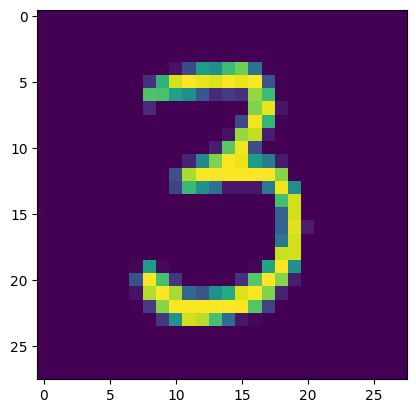

In [9]:
plt.imshow(X_train[50])
plt.show()

Print the Corresponding Label

In [10]:
print(Y_train[50])

3


Image Labels

In [11]:
print(Y_train.shape)

(60000,)


In [12]:
print(Y_test.shape)

(10000,)


Unique values in Y_train

In [13]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


Unique Values in Y_test

In [14]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these Labels as such or we can also apply One-Hot Encoding

All the Images have the same dimesions in this dataset if not, we have to resize all the Images in common dimesions

Scaling the values

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network - Artificial Neural Network (ANN)**

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the Neural Network

In [18]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Training the Neural Network

In [19]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8548 - loss: 0.5049
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1419
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9687 - loss: 0.1030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9755 - loss: 0.0807
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0666
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0548
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9870 - loss: 0.0457
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0403
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0361
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9896 - loss: 0.0321


Training Data Accuracy is 99.05%.

**Accurcay on Test Data**

In [20]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1171


In [21]:
print(accuracy)

0.9704999923706055


Test Data Accuracy is 97.1%.

In [22]:
print(X_test.shape)

(10000, 28, 28)


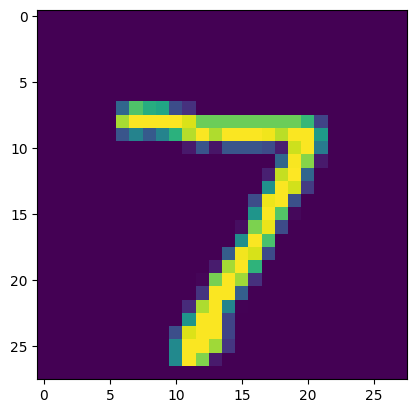

In [23]:
plt.imshow(X_test[0])
plt.show()

In [24]:
print(Y_test[0])

7


In [25]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
Y_pred.shape

(10000, 10)

In [27]:
print(Y_pred[0])

[5.9604252e-05 7.0453608e-01 1.8994488e-01 9.9933159e-01 5.7341015e-08
 1.3920137e-01 1.8254233e-12 1.0000000e+00 6.9291025e-01 9.2254615e-01]


model.predict() gives the probability of each class for that data point

Converting the Prediction Probabilities to Class Label

In [28]:
label_for_first_test_image = np.argmax(Y_pred[0])

In [29]:
print(label_for_first_test_image)

7


Converting the Prediction Probability into Class Label for all Test Data Points

In [30]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [31]:
print(Y_pred)

[[5.9604252e-05 7.0453608e-01 1.8994488e-01 ... 1.0000000e+00
  6.9291025e-01 9.2254615e-01]
 [1.1996637e-04 9.9975926e-01 1.0000000e+00 ... 1.5227635e-02
  8.7296075e-01 2.4855945e-14]
 [4.4449428e-03 9.9990183e-01 2.3046342e-01 ... 8.7821507e-01
  2.0880664e-02 1.3261598e-03]
 ...
 [7.9821422e-07 4.9485257e-03 1.3694021e-06 ... 9.1487306e-01
  6.0090914e-02 6.5672767e-01]
 [6.5153576e-09 5.6069030e-04 2.8610332e-09 ... 5.3422900e-06
  9.0895116e-01 2.8751614e-05]
 [7.8476948e-04 1.2321792e-07 7.3201423e-05 ... 2.1864276e-04
  2.0629674e-05 2.5496476e-07]]


Y_test --> True Labels

Y_pred_labels --> Predicted Labels

**Confusion Matrix**

In [32]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [33]:
print(conf_mat)

tf.Tensor(
[[ 946    0    2    2    3    1    6    3    1   16]
 [   0 1123    1    3    0    1    3    1    3    0]
 [   4    6  974   16    7    0    8    8    9    0]
 [   0    1    2  996    1    1    1    4    2    2]
 [   0    0    1    0  964    0    7    3    1    6]
 [   1    1    0   29    1  849    6    0    2    3]
 [   1    1    0    1    5    4  944    1    1    0]
 [   1    7    9    3    2    0    1  992    3   10]
 [   1    0    1   12    6    7    8    2  931    6]
 [   1    3    0    9   21    3    2    8    1  961]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

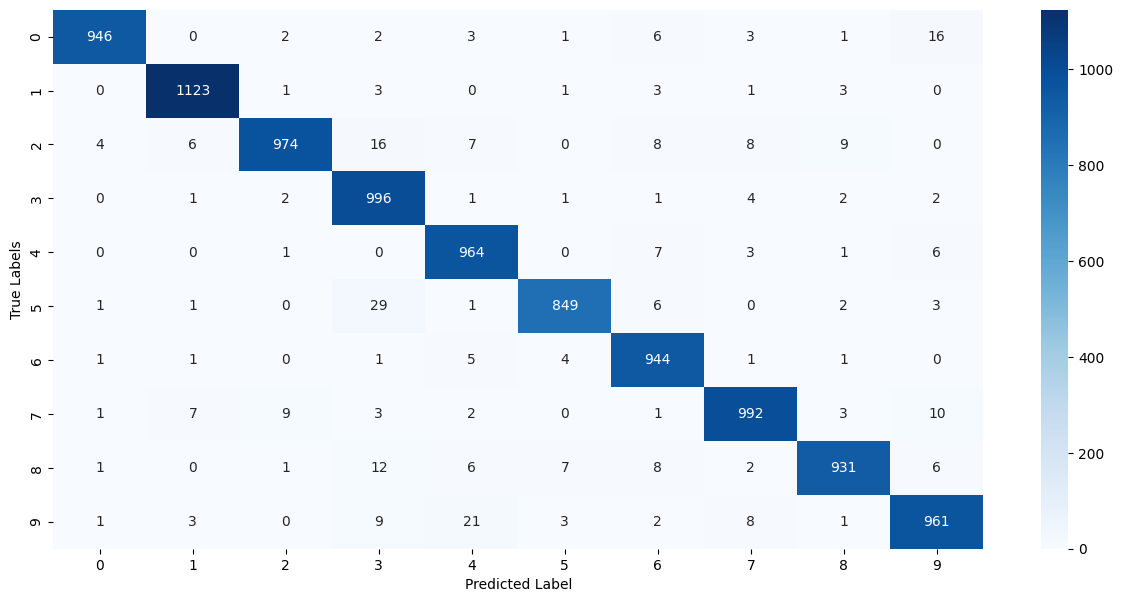

In [34]:
plt.figure(figsize = (15, 7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')

**Building a Predictive System**

In [35]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [36]:
type(input_image)

numpy.ndarray

In [37]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


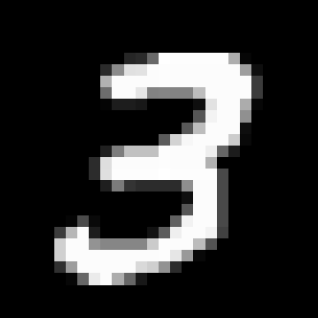

In [38]:
cv2_imshow(input_image)

In [39]:
input_image.shape

(318, 318, 3)

In [40]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [41]:
print(grayscale)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
grayscale.shape

(318, 318)

In [43]:
input_image_resized = cv2.resize(grayscale, (28, 28))

In [44]:
input_image_resized.shape

(28, 28)

In [45]:
cv2_imshow(input_image_resized)

In [46]:
input_image_resized = input_image_resized/255

In [47]:
type(input_image_resized)

numpy.ndarray

In [48]:
image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

In [49]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[2.9480657e-17 9.9822676e-01 1.2989001e-03 1.0000000e+00 9.8737637e-06
  9.8945510e-01 7.2297948e-22 5.1715790e-05 8.3177993e-03 4.1758078e-01]]


In [50]:
input_pred_label = np.argmax(input_prediction)

In [51]:
print(input_pred_label)

3


**Predictive System**

Path of the Image to be Predicted/content/MNIST_digit.png


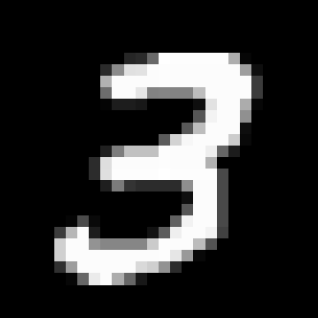

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The Handwritten Digit is recognized as 3


In [53]:
input_image_path = input('Path of the Image to be Predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(grayscale, (28, 28))

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognized as', input_pred_label)